<a href="https://colab.research.google.com/github/allanbraquiel/Data_Science_Projects/blob/master/Projeto_Redasset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prova prática para a vaga de Cientista de Dados Jr**

A Antecipação de recebíveis é o mecanismo no qual empresas (Cedentes) conseguem adiantar  o fluxo de vendas a prazo, duplicatas, vendas parceladas no cartão de crédito, boletos,  cheques pré-datados, contratos de prestação de serviços entre outros. 

Esse adiantamento se  dá por meio de uma instituição financeira que “compra” o recebível do cedente aplicando uma  taxa de juros de deságio a de acordo com o prazo do recebível.  

Para realizar uma análise sobre os dados coletado iremos importar as bibliotecas necessárias para a análise exploratória dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use("fivethirtyeight")
plt.style.use("bmh")
import seaborn as sns

In [2]:
plt.style.available[:10]

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn']

## Exercício 1

O primiero exercício proposto é afzer uma análise descritiva  dos ativos como se fosse realizar uma apresentação para um executivo demonstrando  a situação da carteira atual, onde serão analisado os seguintes fatores:
- Regionalização: distribução por região dos clientes
- Concentrações de clientes: distribuição dos clientes que atuam como cedentes e sacadores
- Taxas de  pagamento: valor real do título, valor de deságio e taxa mensal que foi utilzada para o desconto do título
- Receitas: acumulado dos valores recebidos do deságio.

Nesta primeira análise não serã utilizadas as variáveis RISCO_XX, somente as variáveis de informações do produto e dos envolvidos em cada título.

In [3]:
url = "https://raw.githubusercontent.com/allanbraquiel/Datasets/master/Base_Titulos.txt"

In [4]:
df1 = pd.read_table(url)

In [5]:
df1.head()

,CODIGO,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,SACADO,LIMITE_CEDENTE,ESTADO_CEDENTE,ESTADO_SACADO,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,RISCO_1,RISCO_2,RISCO_3,RISCO_4,RISCO_5,RISCO_6,RISCO_7,RISCO_8,RISCO_9,RISCO_10,RISCO_11,RISCO_12,RISCO_13,RISCO_14,RISCO_15,RISCO_16,RISCO_17,RISCO_18,RISCO_19,RISCO_20,RISCO_21,STATUS_LIQ_TITULO
0,1,Fundo 1,Produto 1,Cedente 2,Sacado 249,10000000,CE,SP,2018-03-18,2017-10-28,2018-03-18,1190.99,166.384869,0.028214,0.028472,1.0,0.000000,NaN,0.000000,NaN,0.0,0.610895,0.000000,NaN,0.000000,NaN,0.168124,0,0.066667,0.2,0.727965,0.738669,0.407407,0.860111,0.985155,EM_DIA
1,2,Fundo 2,Produto 1,Cedente 1,Sacado 1372,8035714,PA,MG,2018-06-24,2018-05-21,2018-06-21,29209.38,571.781205,0.017253,0.192935,0.5,0.958204,0.014139,0.013354,0.246686,0.0,0.380525,0.020198,0.015453,0.666667,0.161228,0.392065,0,0.266667,0.6,0.010041,0.012547,0.395062,0.698438,0.707374,EM_DIA
2,3,Fundo 1,Produto 1,Cedente 2,Sacado 346,10000000,CE,PR,2018-03-19,2017-11-29,2018-03-21,756.66,63.951581,0.022375,0.033609,1.0,0.000000,NaN,0.000000,NaN,0.0,0.581379,0.000000,NaN,0.000000,NaN,0.109617,0,0.066667,0.2,0.327489,0.321123,0.395062,0.890059,0.987560,ATRASO
3,4,Fundo 2,Produto 1,Cedente 1,Sacado 585,8035714,PA,PA,2018-04-03,2018-02-14,2018-04-06,7869.88,190.764728,0.015082,0.183401,0.5,0.124609,0.007712,0.000024,0.684831,0.0,0.179036,0.020187,0.128587,0.666667,0.099808,0.415602,0,0.400000,0.6,0.012217,0.017485,0.419753,0.609827,0.906279,ATRASO
4,5,Fundo 1,Produto 1,Cedente 2,Sacado 2184,10000000,CE,RJ,2018-02-02,2017-11-03,2018-02-02,1064.92,105.976693,0.031770,0.028472,1.0,0.000000,NaN,0.000000,NaN,0.0,0.514459,0.000000,NaN,0.000000,NaN,0.168124,0,0.066667,0.2,0.727965,0.738669,0.407407,0.860111,0.368493,EM_DIA


Verificando o nome das colunas para poder excluir as colunas que não serão utilizadas

In [6]:
df1.columns

Index(['CODIGO', 'NOME_FUNDO', 'TIPO_PRODUTO', 'CEDENTE', 'SACADO',
       'LIMITE_CEDENTE', 'ESTADO_CEDENTE', 'ESTADO_SACADO', 'VENCIMENTO',
       'DATA_EMISSAO', 'DATA_PAGAMENTO', 'VALOR_REAL', 'VALOR_DESAGIO',
       'TAXA_MENSAL', 'RISCO_1', 'RISCO_2', 'RISCO_3', 'RISCO_4', 'RISCO_5',
       'RISCO_6', 'RISCO_7', 'RISCO_8', 'RISCO_9', 'RISCO_10', 'RISCO_11',
       'RISCO_12', 'RISCO_13', 'RISCO_14', 'RISCO_15', 'RISCO_16', 'RISCO_17',
       'RISCO_18', 'RISCO_19', 'RISCO_20', 'RISCO_21', 'STATUS_LIQ_TITULO'],
      dtype='object')

In [7]:
df1.drop(['RISCO_1', 'RISCO_2', 'RISCO_3', 'RISCO_4', 'RISCO_5',
       'RISCO_6', 'RISCO_7', 'RISCO_8', 'RISCO_9', 'RISCO_10', 'RISCO_11',
       'RISCO_12', 'RISCO_13', 'RISCO_14', 'RISCO_15', 'RISCO_16', 'RISCO_17',
       'RISCO_18', 'RISCO_19', 'RISCO_20', 'RISCO_21'], axis=1, inplace=True)

In [8]:
df1.head()

,CODIGO,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,SACADO,LIMITE_CEDENTE,ESTADO_CEDENTE,ESTADO_SACADO,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,STATUS_LIQ_TITULO
0,1,Fundo 1,Produto 1,Cedente 2,Sacado 249,10000000,CE,SP,2018-03-18,2017-10-28,2018-03-18,1190.99,166.384869,0.028214,EM_DIA
1,2,Fundo 2,Produto 1,Cedente 1,Sacado 1372,8035714,PA,MG,2018-06-24,2018-05-21,2018-06-21,29209.38,571.781205,0.017253,EM_DIA
2,3,Fundo 1,Produto 1,Cedente 2,Sacado 346,10000000,CE,PR,2018-03-19,2017-11-29,2018-03-21,756.66,63.951581,0.022375,ATRASO
3,4,Fundo 2,Produto 1,Cedente 1,Sacado 585,8035714,PA,PA,2018-04-03,2018-02-14,2018-04-06,7869.88,190.764728,0.015082,ATRASO
4,5,Fundo 1,Produto 1,Cedente 2,Sacado 2184,10000000,CE,RJ,2018-02-02,2017-11-03,2018-02-02,1064.92,105.976693,0.031770,EM_DIA


In [9]:
df1.VALOR_DESAGIO = df1.VALOR_DESAGIO.round(2)

In [10]:
df1.head()

,CODIGO,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,SACADO,LIMITE_CEDENTE,ESTADO_CEDENTE,ESTADO_SACADO,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,STATUS_LIQ_TITULO
0,1,Fundo 1,Produto 1,Cedente 2,Sacado 249,10000000,CE,SP,2018-03-18,2017-10-28,2018-03-18,1190.99,166.38,0.028214,EM_DIA
1,2,Fundo 2,Produto 1,Cedente 1,Sacado 1372,8035714,PA,MG,2018-06-24,2018-05-21,2018-06-21,29209.38,571.78,0.017253,EM_DIA
2,3,Fundo 1,Produto 1,Cedente 2,Sacado 346,10000000,CE,PR,2018-03-19,2017-11-29,2018-03-21,756.66,63.95,0.022375,ATRASO
3,4,Fundo 2,Produto 1,Cedente 1,Sacado 585,8035714,PA,PA,2018-04-03,2018-02-14,2018-04-06,7869.88,190.76,0.015082,ATRASO
4,5,Fundo 1,Produto 1,Cedente 2,Sacado 2184,10000000,CE,RJ,2018-02-02,2017-11-03,2018-02-02,1064.92,105.98,0.031770,EM_DIA


Aqui verificamos o tipo de dados do dataset

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9415 entries, 0 to 9414
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CODIGO             9415 non-null   int64  
 1   NOME_FUNDO         9415 non-null   object 
 2   TIPO_PRODUTO       9415 non-null   object 
 3   CEDENTE            9415 non-null   object 
 4   SACADO             9415 non-null   object 
 5   LIMITE_CEDENTE     9415 non-null   int64  
 6   ESTADO_CEDENTE     9415 non-null   object 
 7   ESTADO_SACADO      9173 non-null   object 
 8   VENCIMENTO         9415 non-null   object 
 9   DATA_EMISSAO       9415 non-null   object 
 10  DATA_PAGAMENTO     9415 non-null   object 
 11  VALOR_REAL         9415 non-null   float64
 12  VALOR_DESAGIO      9415 non-null   float64
 13  TAXA_MENSAL        9413 non-null   float64
 14  STATUS_LIQ_TITULO  9415 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.1+ MB


Quantidade de títulos que foram liquidados em dia e que foram pagos em atraso

In [12]:
df1.STATUS_LIQ_TITULO.value_counts()

EM_DIA    7548
ATRASO    1867
Name: STATUS_LIQ_TITULO, dtype: int64

Porcetualmente

In [13]:
df1.STATUS_LIQ_TITULO.value_counts(normalize=True)

EM_DIA    0.801699
ATRASO    0.198301
Name: STATUS_LIQ_TITULO, dtype: float64

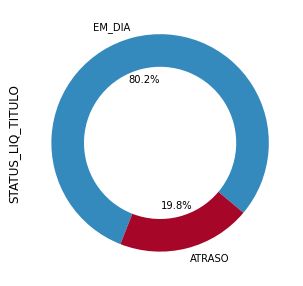

In [127]:
df1.STATUS_LIQ_TITULO.value_counts(normalize=True).plot.pie(figsize=(8, 5),wedgeprops=dict(width=0.3), startangle=-40, autopct="%1.1f%%")

#Contagem de cedentes por Estado

O cedente é uma empresa que tem um título com prazo de validade posterior a data atual mas precisa do valor neste momento, então ele procura a empresa que fornecerá um adiantamento deste valor cobrando um valor de deságio pelos serviços prestados

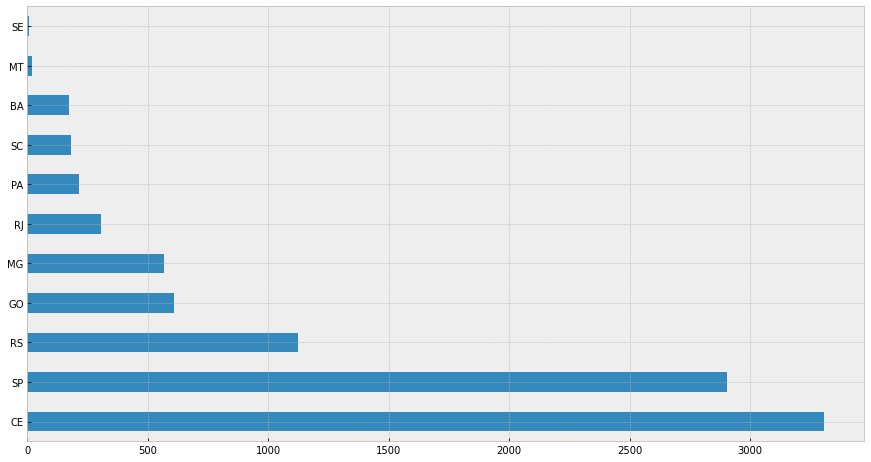

In [129]:
df1.ESTADO_CEDENTE.value_counts().plot.barh(figsize=(15,8))

Como vemos no gráfico acima, o estado do Ceará e São Paulo são os estados onde estão concentrados o maior quantidade de cedentes

#Contagem de sacadores por Estado

Os sacadores são as instituições financeiras que "compram" o recebível do cedente aplicando uma taxa de juros de deságio de acordo com o prazo do recebível.  


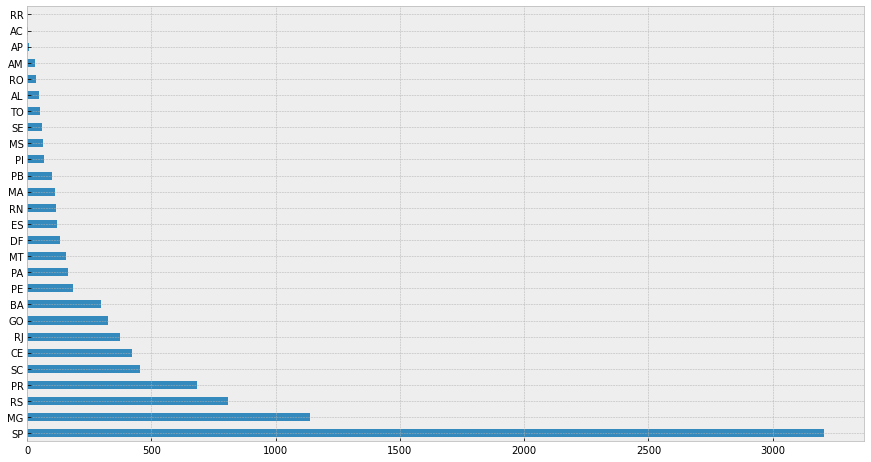

In [16]:
df1.ESTADO_SACADO.value_counts().plot.barh(figsize=(15,8))

Por outro lado, a maior concentração de instiuições financeiras que comprar estes títulos está em São Paulo, seguido por Minas Gerais e Rio Grande do Sul.

#Produtos

Existem 5 tipos de produtos(títulos) diferentes. Observando a quanitidade de produtos oferecidos, podemos ver que o Produto 1 é o mais utilizado, enquanto o Produto 4 é o menos utilizado.

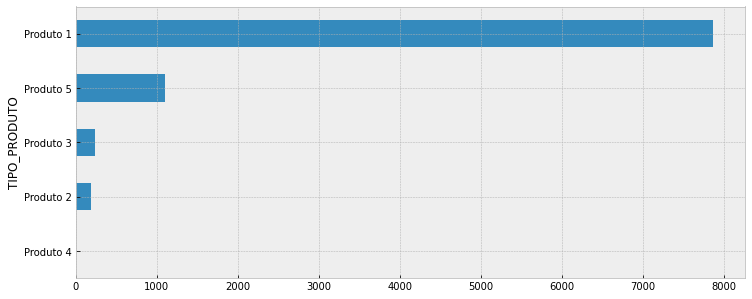

In [17]:
df1.groupby(by="TIPO_PRODUTO")["STATUS_LIQ_TITULO"].count().sort_values().plot.barh(figsize=(12,5))

Para podermos entender melhor como os produtos estão distribuídos, veremos entre os produtos a quantidade que estão sendo liquidados em dia ou em atraso.

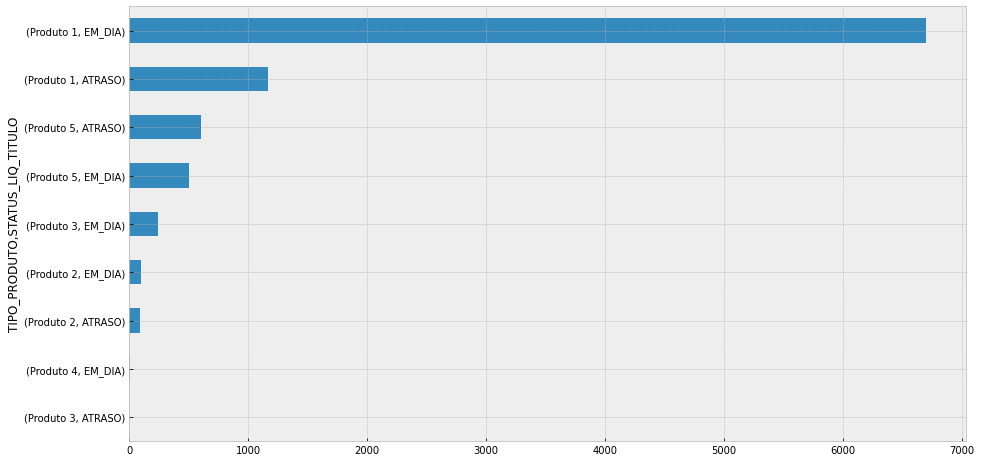

In [18]:
df1.groupby(by=["TIPO_PRODUTO", "STATUS_LIQ_TITULO"])["STATUS_LIQ_TITULO"].count().sort_values().plot.barh(figsize=(15,8))

Observando o gráfico acima, constatamos que o Produto 5 tem mais títulos pagos em atraso do liquidados em dia, dessa forma é necessário uma análise mais profunda sobre este produto, de forma a entender o porquê deste produto ter mais pagamentos em atraso do que em dia, proporcionalmente se comarado com os outros produtos.

#Agrupando os dados por Estado do cedente e tipo de produto que foi adquirido

Como vimos anteriormente, o produto que tem uma maior saída é o Produto 1, mas também precisamos ver como os produtos estão distribuídos por estado

In [19]:
df1.groupby(by=["ESTADO_CEDENTE", "TIPO_PRODUTO"])["STATUS_LIQ_TITULO"].count().sort_values(ascending=False)#.reset_index()

ESTADO_CEDENTE  TIPO_PRODUTO
CE              Produto 1       3266
SP              Produto 1       2763
RS              Produto 1        599
                Produto 5        511
GO              Produto 5        510
RJ              Produto 1        304
MG              Produto 1        293
PA              Produto 1        210
MG              Produto 3        194
SC              Produto 1        173
BA              Produto 1        132
GO              Produto 1         99
SP              Produto 2         89
MG              Produto 5         63
CE              Produto 2         36
BA              Produto 2         30
SP              Produto 5         25
                Produto 3         25
MT              Produto 1         21
MG              Produto 2         17
RS              Produto 2         11
BA              Produto 3         10
SE              Produto 1          7
SC              Produto 2          6
RS              Produto 3          4
PA              Produto 3          4
SC       

Agora veremos a média dos valores dos títulos, a média do valor de deságio e a média da taxa mensal que foi aplicada em cada estado, separando pelo status do pagamento para indetificar se há alguma relação entre a taxa cobrada e o pagamento em atraso.

In [20]:
df1.groupby(by=["ESTADO_CEDENTE", "STATUS_LIQ_TITULO"])["VALOR_REAL", "VALOR_DESAGIO", "TAXA_MENSAL"].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VALOR_REAL  VALOR_DESAGIO  TAXA_MENSAL
ESTADO_CEDENTE STATUS_LIQ_TITULO                                           
BA             ATRASO              15677.175652    1568.138696     0.051546
               EM_DIA              25772.749060    1733.504899     0.053094
CE             ATRASO               3123.255616     217.746920     0.038900
               EM_DIA               3606.011735     245.757183     0.046529
GO             ATRASO                573.840435     109.978951     0.014406
               EM_DIA                939.248899      97.787523     0.026277
MG             ATRASO               8383.085620     570.077438     0.096174
               EM_DIA              20504.518520    1196.694731     0.058791
MT             ATRASO             150168.440000   13544.053333     0.067352
               EM_DIA              66295.888947    3123.130526     0.074395
PA             ATRASO              14517.814400     632.578400     0.053860
               EM_DIA              15970.982804     834.637143     0.053912
RJ             ATRASO              26072.913750    2220.125417     0.042054
               EM_DIA               6304.452206     437.281459     0.041244
RS             ATRASO               2260.476806     278.553156     0.027476
               EM_DIA               4761.770568     386.297749     0.036756
SC             ATRASO               1484.984783      91.685217     0.036628
               EM_DIA               2098.251985     141.762868     0.041713
SE             ATRASO               4957.925000     586.280000     0.027088
               EM_DIA               1421.898333      53.133333     0.041399
SP             ATRASO               9846.664245     998.259376     0.057102
               EM_DIA               7021.366228     610.017889     0.052980

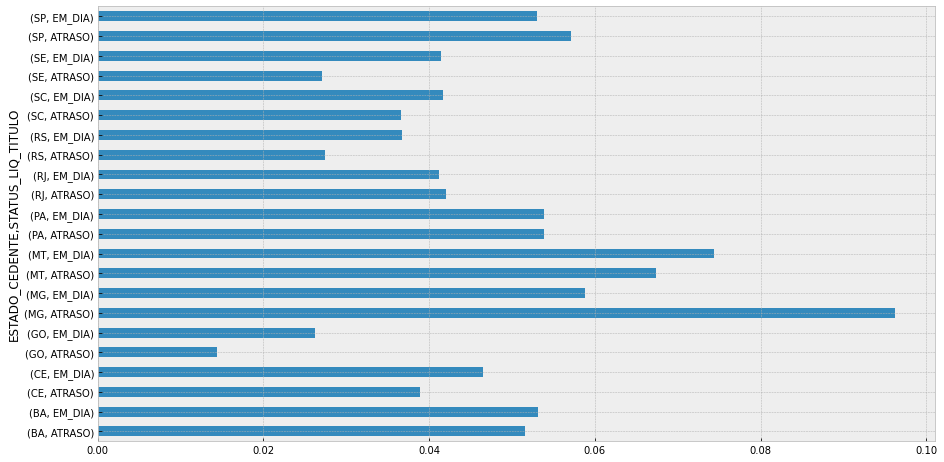

In [21]:
df1.groupby(by=["ESTADO_CEDENTE", "STATUS_LIQ_TITULO"])["TAXA_MENSAL"].mean().plot.barh(figsize=(15,8))

Em alguns estados, a média da taxa mensal de juros aplicada nos que forma pagos com atraso é menor que a taxa dos que foram pagos em dia, o que indica que uma taxa de juros maior não incluencia no não pagamento em dia dos títulos.

Agora, iremos verificar quais são os cedentes que mais acionaram a empresa, em questão de valores, ordenando pelo cedente que maior valor de deságio (somente os 10 primeiros)

In [22]:
df1.groupby(by="CEDENTE")["VALOR_REAL", "VALOR_DESAGIO"].sum().sort_values(by="VALOR_DESAGIO", ascending=False).head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VALOR_REAL,VALOR_DESAGIO
CEDENTE,,
Cedente 13,5329983.11,593208.88
Cedente 1,10280760.20,562769.33
Cedente 3,9011644.10,486804.83
Cedente 11,3559953.22,481305.25
Cedente 2,4639191.77,398778.38
Cedente 9,4987095.02,331611.31
Cedente 10,4191119.98,274032.58
Cedente 19,3129771.15,213011.26
Cedente 24,3044420.31,177159.94


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


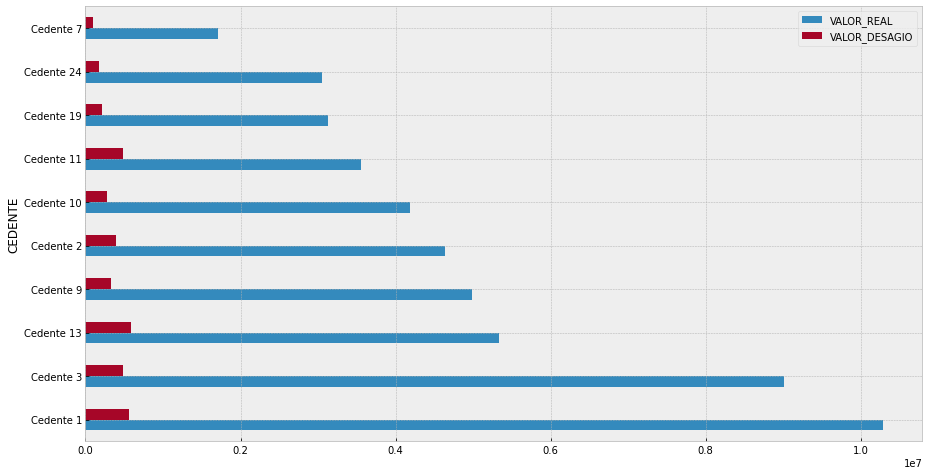

In [23]:
df1.groupby(by="CEDENTE")["VALOR_REAL", "VALOR_DESAGIO"].sum().sort_values(by="VALOR_REAL", ascending=False).head(10).plot.barh(figsize=(15,8))

De acordo com o grafico acima, nem sempre o cedente que movimenta os maiores valores de títulos pagam os maiores valores de deságio, como podemos ver o Cedente 13 tem um acumulado similar ao Cedente 1, mesmo que este tenha utlilizado quase o dobro de títulos (em valores).

Para confirmar estes dados, iremos separar os valores reais dos títulos do valores de deságio, para conferirmos os valores acumulados por Cedente

In [24]:
agrupado_cedente_desagio = df1.groupby(by="CEDENTE")["VALOR_DESAGIO"].sum().sort_values(ascending=False)
agrupado_cedente_valor = df1.groupby(by="CEDENTE")["VALOR_REAL"].sum().sort_values(ascending=False)

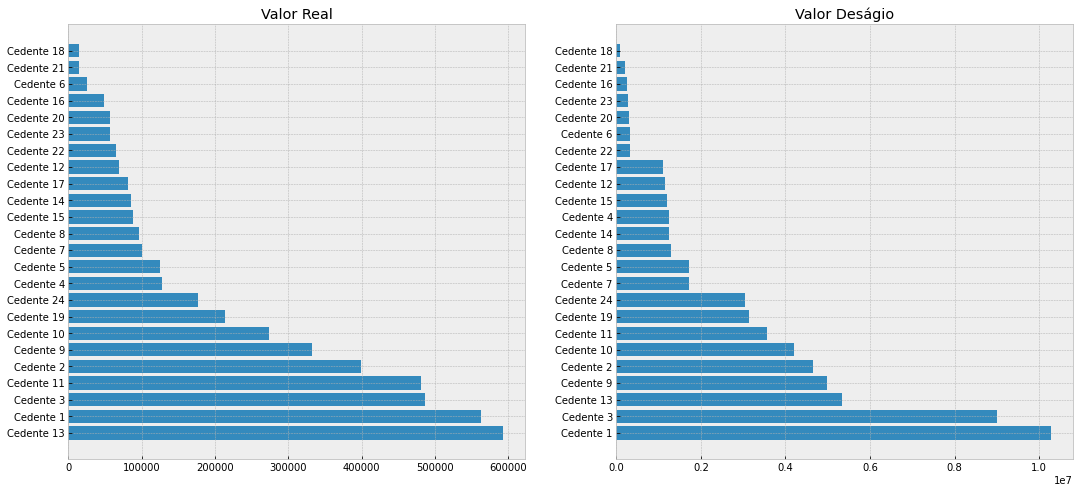

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

# Dados para cada subplot
ax1.barh(agrupado_cedente_desagio.index, agrupado_cedente_desagio.values)
ax1.set_title("Valor Real")
ax2.barh(agrupado_cedente_valor.index, agrupado_cedente_valor.values)
ax2.set_title("Valor Deságio")
plt.show()

Como podemos ver, o Cedente 13 alcançou um maior valor real dos títulos mas foi o Cedente 1 quem pagou um maior valor de deságio.

Apesar do Cedente 1 ter pagado um valor maior de deságio, o Cedente 15 é o cedente que mais pagou deságio em média, seguido pelo Cedente 10 e Cedente 7, enquanto o Cedente 1 é o 5º colocado.

In [26]:
df1.groupby(by=["CEDENTE"])["TAXA_MENSAL"].mean().sort_values(ascending=False).head(10)

CEDENTE
Cedente 15    0.100973
Cedente 10    0.084950
Cedente 7     0.073434
Cedente 3     0.072665
Cedente 1     0.059153
Cedente 4     0.053614
Cedente 17    0.053426
Cedente 9     0.051748
Cedente 5     0.047169
Cedente 14    0.046900
Name: TAXA_MENSAL, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

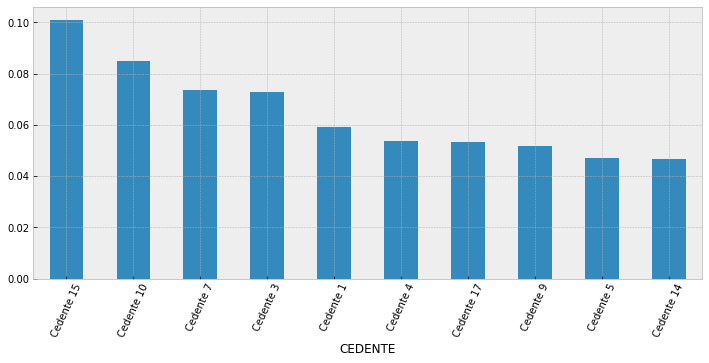

In [27]:
df1.groupby(by=["CEDENTE"])["TAXA_MENSAL"].mean().sort_values(ascending=False).head(10).plot.bar(figsize=(12,5))
plt.xticks(rotation=65)

Observando agora o valor de deságio por cada produto

In [28]:
df1.groupby(by=["TIPO_PRODUTO",])["VALOR_DESAGIO"].sum().sort_values(ascending=False)

TIPO_PRODUTO
Produto 1    2045414.09
Produto 2    1184111.04
Produto 3    1085558.98
Produto 5     238566.03
Produto 4      19308.33
Name: VALOR_DESAGIO, dtype: float64

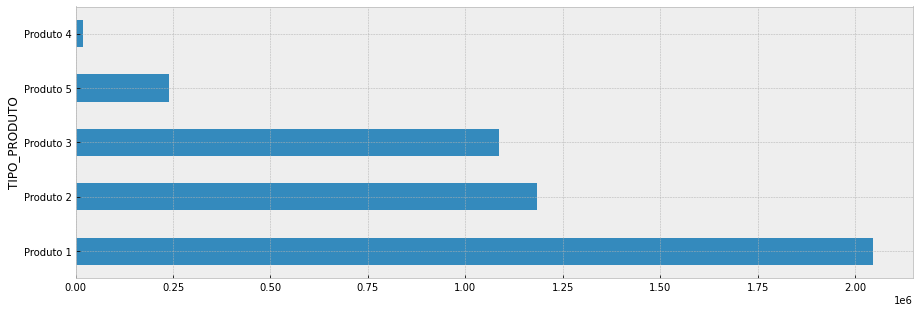

In [29]:
df1.groupby(by=["TIPO_PRODUTO",])["VALOR_DESAGIO"].sum().sort_values(ascending=False).plot.barh(figsize=(15,5))

Este agrupamento reúne informações do cedente mostrando o status da liquidação do título e o produto adquirido, somando os valores dos títulos, valores de deságio e a soma da taxa mensal de cada situação apresentada.

In [30]:
df1.groupby(by=["CEDENTE", "STATUS_LIQ_TITULO", "TIPO_PRODUTO"])["VALOR_REAL", "VALOR_DESAGIO", "TAXA_MENSAL"].sum().head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VALOR_REAL  ...  TAXA_MENSAL
CEDENTE    STATUS_LIQ_TITULO TIPO_PRODUTO              ...             
Cedente 1  ATRASO            Produto 1     1198815.82  ...     8.660295
           EM_DIA            Produto 1     8878182.81  ...    79.663194
                             Produto 3      203761.57  ...     0.346430
Cedente 10 ATRASO            Produto 1       49410.53  ...     0.065929
                             Produto 2      164266.05  ...     0.290649
           EM_DIA            Produto 1     1584526.09  ...     1.044534
                             Produto 2     1358506.65  ...     1.949211
                             Produto 3     1034410.66  ...     0.897174
Cedente 11 ATRASO            Produto 1       11490.29  ...     0.805382
           EM_DIA            Produto 1      108462.93  ...     2.893123
                             Produto 3     3440000.00  ...     0.129422
Cedente 12 ATRASO            Produto 1       10542.89  ...     0.146137
           EM_DIA            Produto 1      375211.81  ...     4.206390
                             Produto 3      758134.30  ...     0.089759
Cedente 13 ATRASO            Produto 1      269464.83  ...     0.143955
                             Produto 2     1517797.42  ...     0.471288
           EM_DIA            Produto 1     1216909.29  ...     0.659352
                             Produto 2     2325811.57  ...     0.774068
Cedente 14 ATRASO            Produto 1       23974.81  ...     0.788053
                             Produto 2       87639.21  ...     0.284039

[20 rows x 3 columns]

Neste agrupemento podemos ver a média dos valores dos títulos e média do valor de deságio por cada produto e a situação em que ele foi liquidado.

In [31]:
df1.groupby(by=["STATUS_LIQ_TITULO", "TIPO_PRODUTO"])["VALOR_REAL", "VALOR_DESAGIO"].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VALOR_REAL  VALOR_DESAGIO
STATUS_LIQ_TITULO TIPO_PRODUTO                              
ATRASO            Produto 1       3200.688195     200.553618
                  Produto 2      51451.105795    5205.927500
                  Produto 3     250656.573333   22988.993333
                  Produto 5        856.763970     183.463262
EM_DIA            Produto 1       4241.229915     270.374277
                  Produto 2      93891.613922    7117.543333
                  Produto 3      49119.713182    4200.793388
                  Produto 4     140261.107500    4827.082500
                  Produto 5       1199.446733     253.394084

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


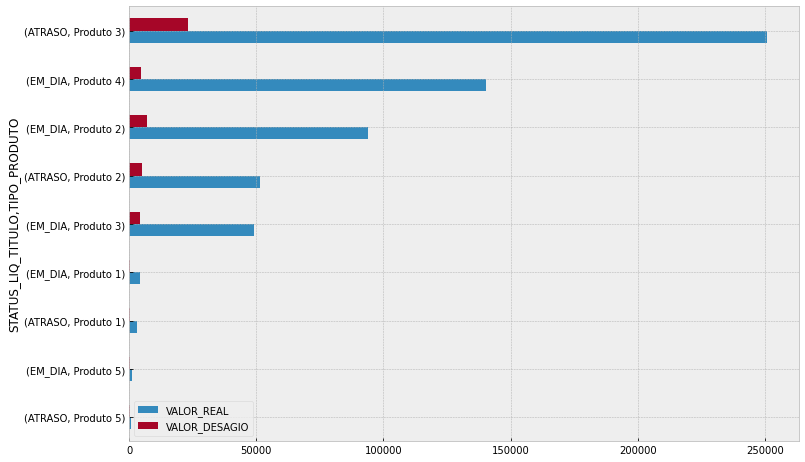

In [32]:
df1.groupby(by=["STATUS_LIQ_TITULO", "TIPO_PRODUTO"])["VALOR_REAL", "VALOR_DESAGIO"].mean().sort_values(by="VALOR_REAL").plot.barh(figsize=(12,8))

Verificando a quantidade de cada produto entre os títulos negociados

In [33]:
df1.TIPO_PRODUTO.value_counts()

Produto 1    7867
Produto 5    1109
Produto 3     245
Produto 2     190
Produto 4       4
Name: TIPO_PRODUTO, dtype: int64

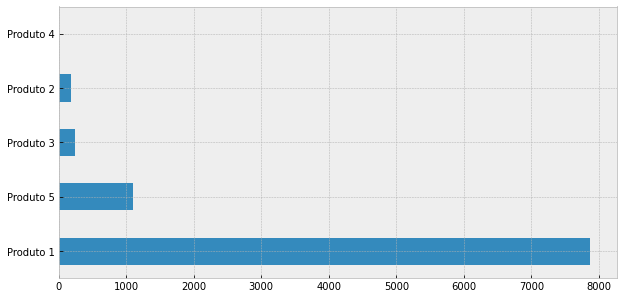

In [34]:
df1.TIPO_PRODUTO.value_counts().plot.barh(figsize=(10,5))

Observado agora a quantidade de títulos por tipo de fundo

In [35]:
df1.NOME_FUNDO.value_counts()

Fundo 1    6005
Fundo 2    2628
Fundo 4     472
Fundo 3     306
Fundo 5       4
Name: NOME_FUNDO, dtype: int64

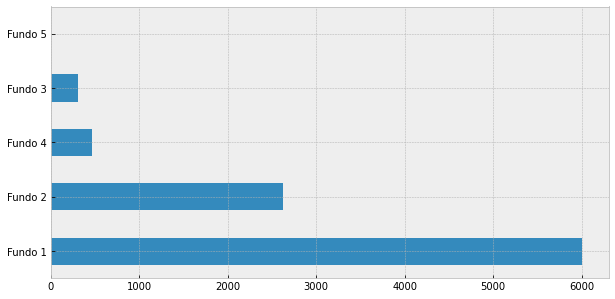

In [36]:
df1.NOME_FUNDO.value_counts().plot.barh(figsize=(10,5))

In [37]:
df1.groupby(by=["CEDENTE"])["VALOR_DESAGIO"].sum().sort_values(ascending=False).head(10)

CEDENTE
Cedente 13    593208.88
Cedente 1     562769.33
Cedente 3     486804.83
Cedente 11    481305.25
Cedente 2     398778.38
Cedente 9     331611.31
Cedente 10    274032.58
Cedente 19    213011.26
Cedente 24    177159.94
Cedente 4     127661.93
Name: VALOR_DESAGIO, dtype: float64

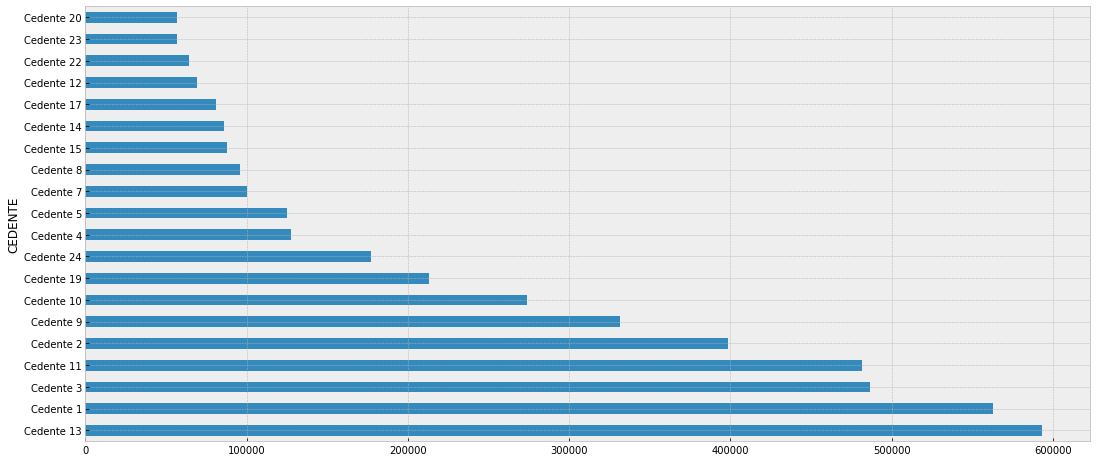

In [38]:
df1.groupby(by=["CEDENTE"])["VALOR_DESAGIO"].sum().sort_values(ascending=False).head(20).plot.barh(figsize=(18,8))

O Sacado é a instituição financeira que paga o título ao cedente. Agora veremos a soma de títulos de acordo com cada Sacado (somente os 10 primeiros)

In [39]:
df1.groupby(by=["SACADO"])["VALOR_DESAGIO"].sum().sort_values(ascending=False).head(10)

SACADO
Sacado 657     473852.95
Sacado 2       379891.75
Sacado 181     222459.27
Sacado 612     168134.20
Sacado 1797    104119.75
Sacado 2155     76220.09
Sacado 311      68931.34
Sacado 37       66056.75
Sacado 1273     59457.14
Sacado 1800     52501.70
Name: VALOR_DESAGIO, dtype: float64

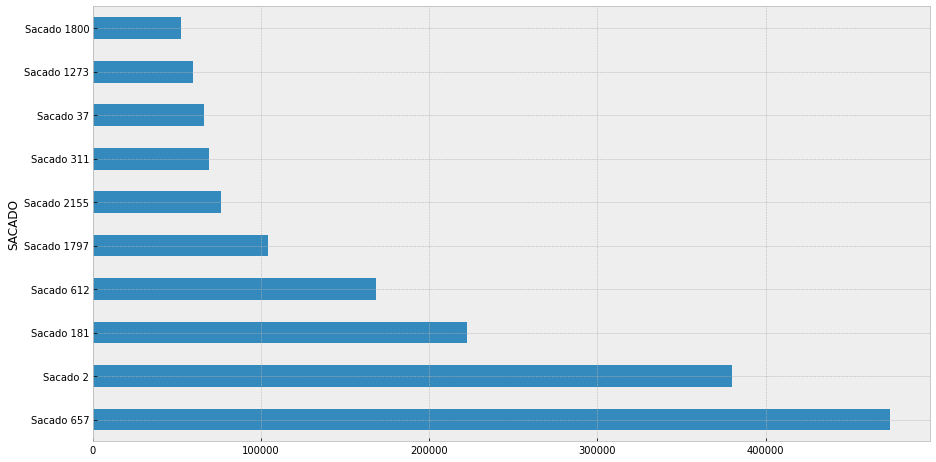

In [40]:
df1.groupby(by=["SACADO"])["VALOR_DESAGIO"].sum().sort_values(ascending=False).head(10).plot.barh(figsize=(15,8))

Como podemos ver no gráfico acima, a instituição financeira que mais contribui é o Sacado 657 seguido do Sacado 2 e do Sacado 181.

In [41]:
df1.groupby(by=["ESTADO_SACADO"])["VALOR_REAL", "VALOR_DESAGIO"].sum().sort_values(by="VALOR_REAL",ascending=False).head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VALOR_REAL,VALOR_DESAGIO
ESTADO_SACADO,,
SP,25306117.91,1916508.68
MG,8846694.18,597941.51
RS,3883781.90,306679.37
PR,3500555.12,256474.03
RJ,1824258.59,100252.90
CE,1807123.06,110906.53
GO,1531952.74,103670.08
BA,1528328.72,105183.32
SC,1498168.67,100094.97


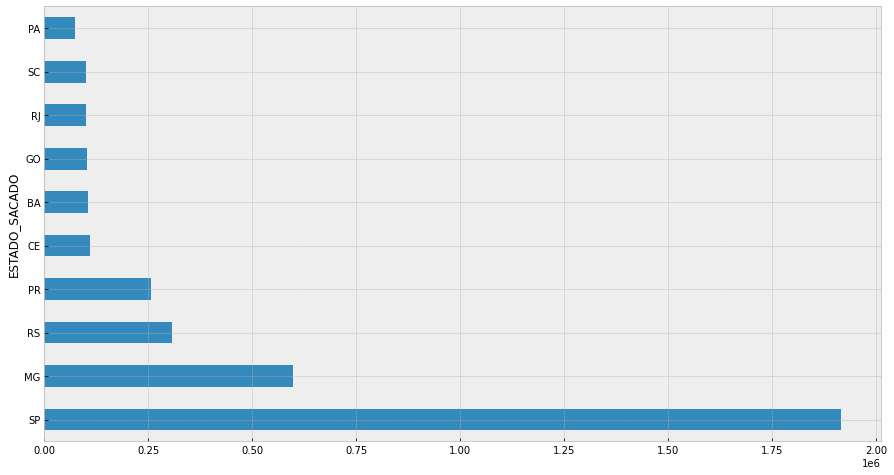

In [42]:
df1.groupby(by=["ESTADO_SACADO"])["VALOR_DESAGIO"].sum().sort_values(ascending=False).head(10).plot.barh(figsize=(15,8))

Como podemos ver neste gráfico, o estado de São Paulo concentra a maior quantidade de movimentação de valores dos títulos

## Exercício 2

Com base no mesmo arquivo calcule indicadores por cedentes que achar necessários e  utilize técnicas de algoritmos não supervisionados para criar uma segmentação de  Cedentes com base em perfis parecidos, de acordo com os indicadores calculados. 
 
Detalhe a escolha da metodologia e os indicadores criados para realizar a  segmentação. Nesse momento não é necessário utilizar as variáveis RISCO_XX. 


In [43]:
df2 = pd.read_table(url)

In [44]:
df2.columns

Index(['CODIGO', 'NOME_FUNDO', 'TIPO_PRODUTO', 'CEDENTE', 'SACADO',
       'LIMITE_CEDENTE', 'ESTADO_CEDENTE', 'ESTADO_SACADO', 'VENCIMENTO',
       'DATA_EMISSAO', 'DATA_PAGAMENTO', 'VALOR_REAL', 'VALOR_DESAGIO',
       'TAXA_MENSAL', 'RISCO_1', 'RISCO_2', 'RISCO_3', 'RISCO_4', 'RISCO_5',
       'RISCO_6', 'RISCO_7', 'RISCO_8', 'RISCO_9', 'RISCO_10', 'RISCO_11',
       'RISCO_12', 'RISCO_13', 'RISCO_14', 'RISCO_15', 'RISCO_16', 'RISCO_17',
       'RISCO_18', 'RISCO_19', 'RISCO_20', 'RISCO_21', 'STATUS_LIQ_TITULO'],
      dtype='object')

In [45]:
lista_cedente = ['CODIGO', 'NOME_FUNDO', 'TIPO_PRODUTO', 'CEDENTE', 'LIMITE_CEDENTE', 
         'ESTADO_CEDENTE', 'VENCIMENTO', 'DATA_EMISSAO', 'DATA_PAGAMENTO', 
         'VALOR_REAL', 'VALOR_DESAGIO', 'TAXA_MENSAL','STATUS_LIQ_TITULO']

In [46]:
lista = ['CODIGO', 'NOME_FUNDO', 'TIPO_PRODUTO', 'CEDENTE', 'SACADO', 'LIMITE_CEDENTE', 
         'ESTADO_CEDENTE', 'ESTADO_SACADO', 'VENCIMENTO', 'DATA_EMISSAO', 'DATA_PAGAMENTO', 
         'VALOR_REAL', 'VALOR_DESAGIO', 'TAXA_MENSAL','STATUS_LIQ_TITULO']

In [47]:
df2 = df2[lista_cedente]

In [48]:
df2.head()

,CODIGO,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,LIMITE_CEDENTE,ESTADO_CEDENTE,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,STATUS_LIQ_TITULO
0,1,Fundo 1,Produto 1,Cedente 2,10000000,CE,2018-03-18,2017-10-28,2018-03-18,1190.99,166.384869,0.028214,EM_DIA
1,2,Fundo 2,Produto 1,Cedente 1,8035714,PA,2018-06-24,2018-05-21,2018-06-21,29209.38,571.781205,0.017253,EM_DIA
2,3,Fundo 1,Produto 1,Cedente 2,10000000,CE,2018-03-19,2017-11-29,2018-03-21,756.66,63.951581,0.022375,ATRASO
3,4,Fundo 2,Produto 1,Cedente 1,8035714,PA,2018-04-03,2018-02-14,2018-04-06,7869.88,190.764728,0.015082,ATRASO
4,5,Fundo 1,Produto 1,Cedente 2,10000000,CE,2018-02-02,2017-11-03,2018-02-02,1064.92,105.976693,0.031770,EM_DIA


Após carregar os dados é importante verificar se há algum dado inválido (nulo), pois dados faltante podem prejuducar o treinamento do modelo

In [49]:
df2.isnull().sum()

CODIGO               0
NOME_FUNDO           0
TIPO_PRODUTO         0
CEDENTE              0
LIMITE_CEDENTE       0
ESTADO_CEDENTE       0
VENCIMENTO           0
DATA_EMISSAO         0
DATA_PAGAMENTO       0
VALOR_REAL           0
VALOR_DESAGIO        0
TAXA_MENSAL          2
STATUS_LIQ_TITULO    0
dtype: int64

Como foi encontrado valores nulos na coluna TAXA_MENSAL, iremos subsitiruir por zero, para não prejudicar a análise

In [50]:
df2.fillna(0, inplace=True)

In [51]:
df2.isnull().sum()

CODIGO               0
NOME_FUNDO           0
TIPO_PRODUTO         0
CEDENTE              0
LIMITE_CEDENTE       0
ESTADO_CEDENTE       0
VENCIMENTO           0
DATA_EMISSAO         0
DATA_PAGAMENTO       0
VALOR_REAL           0
VALOR_DESAGIO        0
TAXA_MENSAL          0
STATUS_LIQ_TITULO    0
dtype: int64

Devido ao fato de não sabermos quantos grupos este dataset pode ser dividido, utilizaremos o método Elbow, que consiste em uma técnica que testa a variância dos dados em relação ao número de clusters (grupos). Sendo assim, um valor é considerado ideal quando o aumento no número de clusters não representa um valor significativo de ganho.

Mas antes, iremos transformar todas as variáveis categóricas e strings em variáceis numéricas utilizando o método Label Encoder

In [52]:
from sklearn import preprocessing

In [53]:
label1 = preprocessing.LabelEncoder()
label2 = preprocessing.LabelEncoder()
label3 = preprocessing.LabelEncoder()
label4 = preprocessing.LabelEncoder()
label5 = preprocessing.LabelEncoder()
label6 = preprocessing.LabelEncoder()
label7 = preprocessing.LabelEncoder()
label8 = preprocessing.LabelEncoder()

In [54]:
df2.NOME_FUNDO = label1.fit_transform(df2.NOME_FUNDO)
df2.TIPO_PRODUTO = label2.fit_transform(df2.TIPO_PRODUTO)
df2.CEDENTE = label3.fit_transform(df2.CEDENTE)
df2.ESTADO_CEDENTE = label4.fit_transform(df2.ESTADO_CEDENTE)
df2.VENCIMENTO = label5.fit_transform(df2.VENCIMENTO)
df2.DATA_EMISSAO = label6.fit_transform(df2.DATA_EMISSAO)
df2.DATA_PAGAMENTO = label7.fit_transform(df2.DATA_PAGAMENTO)
df2.STATUS_LIQ_TITULO = label8.fit_transform(df2.STATUS_LIQ_TITULO)

In [55]:
from sklearn.cluster import KMeans

In [56]:
df2 = df2.iloc[: , :].values
inertia = []
for n in range(1, 11):
  algorithm = (KMeans(n_clusters = n))
  algorithm.fit(df2)
  inertia.append(algorithm.inertia_)

In [57]:
df2

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.66384869e+02, 2.82135860e-02, 1.00000000e+00],
       [2.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        5.71781205e+02, 1.72525430e-02, 1.00000000e+00],
       [3.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.39515806e+01, 2.23746070e-02, 0.00000000e+00],
       ...,
       [9.41300000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        3.29181538e+02, 2.45663350e-02, 1.00000000e+00],
       [9.41400000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        6.52106314e+00, 3.57180710e-02, 0.00000000e+00],
       [9.41500000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        2.12156248e+02, 4.13007000e-02, 1.00000000e+00]])

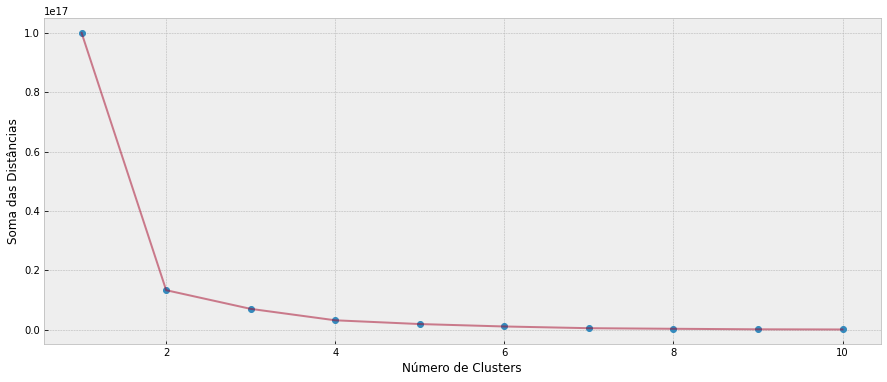

In [58]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias')
plt.show()

Agora que ficou claro para nós a quantidade de grupos (clusters) no conjunto de dados podemos separá-los e rotular o conjunto de dados com esta informação

In [59]:
algorithm = (KMeans(n_clusters = 2))
algorithm.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Agora basta carregar o datase original novamente e acrescentar a coluna com o grupo cada qual registro pertence

In [60]:
df2 = df1[lista_cedente]

In [61]:
df2["clusters"] = algorithm.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Observamos agora como ficou o dataset

In [62]:
df2.head()

,CODIGO,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,LIMITE_CEDENTE,ESTADO_CEDENTE,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,STATUS_LIQ_TITULO,clusters
0,1,Fundo 1,Produto 1,Cedente 2,10000000,CE,2018-03-18,2017-10-28,2018-03-18,1190.99,166.38,0.028214,EM_DIA,0
1,2,Fundo 2,Produto 1,Cedente 1,8035714,PA,2018-06-24,2018-05-21,2018-06-21,29209.38,571.78,0.017253,EM_DIA,0
2,3,Fundo 1,Produto 1,Cedente 2,10000000,CE,2018-03-19,2017-11-29,2018-03-21,756.66,63.95,0.022375,ATRASO,0
3,4,Fundo 2,Produto 1,Cedente 1,8035714,PA,2018-04-03,2018-02-14,2018-04-06,7869.88,190.76,0.015082,ATRASO,0
4,5,Fundo 1,Produto 1,Cedente 2,10000000,CE,2018-02-02,2017-11-03,2018-02-02,1064.92,105.98,0.031770,EM_DIA,0


Para podermos avaliar a diferença dos registros que pertecem a grupos diferentes, iremos criar dois datasets: um do grupo 0 e outro do grupo 1

In [63]:
grupo1 = df2.query("clusters == 1")
grupo0 = df2.query("clusters == 0")

Agrupando cada grupo de registros por cedente e valor do título e valor do deságio

In [64]:
agrupado_cedente_desagio_grupo0 = grupo0.groupby(by="CEDENTE")["VALOR_DESAGIO"].sum().sort_values(ascending=False)
agrupado_cedente_valor_grupo0 = grupo0.groupby(by="CEDENTE")["VALOR_REAL"].sum().sort_values(ascending=False)

agrupado_cedente_desagio_grupo1 = grupo1.groupby(by="CEDENTE")["VALOR_DESAGIO"].sum().sort_values(ascending=False)
agrupado_cedente_valor_grupo1 = grupo1.groupby(by="CEDENTE")["VALOR_REAL"].sum().sort_values(ascending=False)

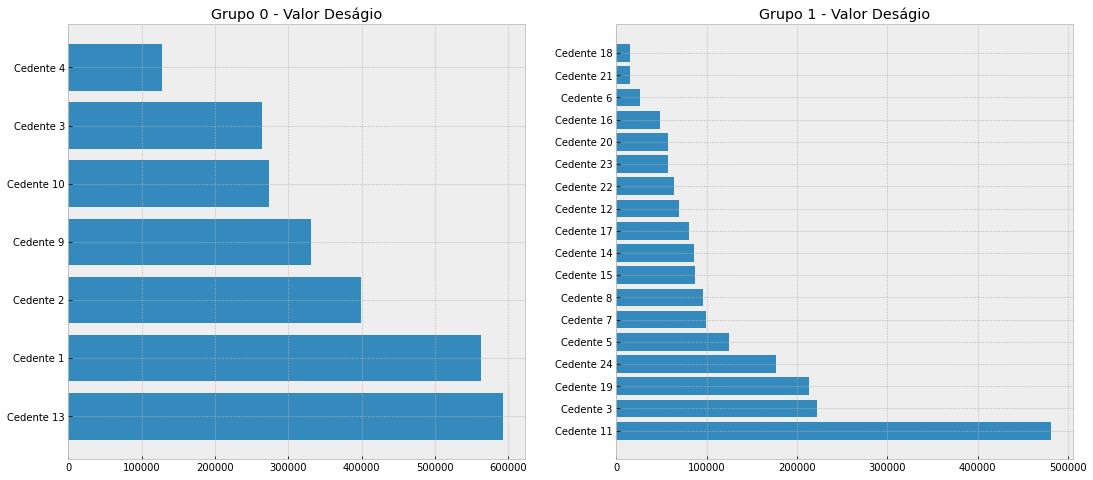

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

# Dados para cada subplot
ax1.barh(agrupado_cedente_desagio_grupo0.index, agrupado_cedente_desagio_grupo0.values)
ax1.set_title("Grupo 0 - Valor Deságio")
ax2.barh(agrupado_cedente_desagio_grupo1.index, agrupado_cedente_desagio_grupo1.values)
ax2.set_title("Grupo 1 - Valor Deságio")

plt.show()

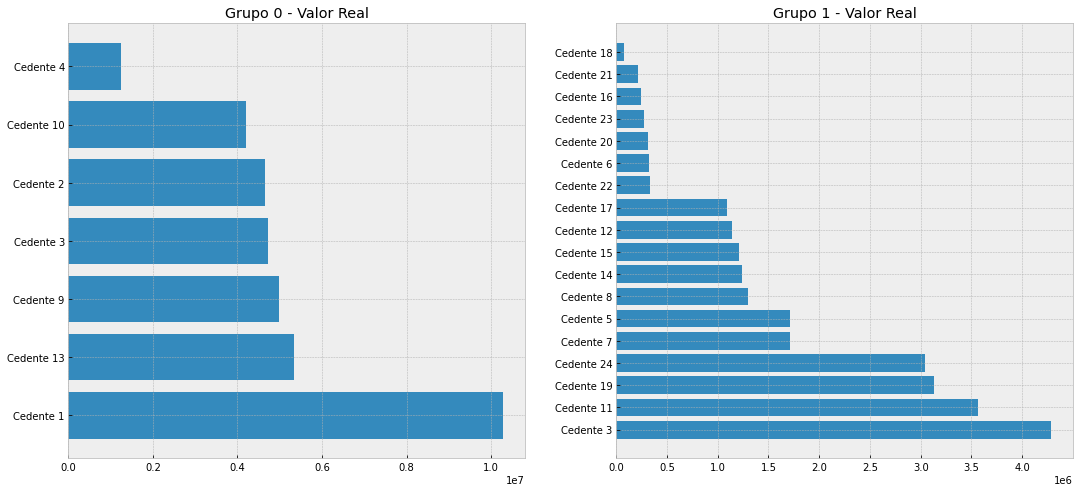

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

# Dados para cada subplot
ax1.barh(agrupado_cedente_valor_grupo0.index, agrupado_cedente_valor_grupo0.values)
ax1.set_title("Grupo 0 - Valor Real")
ax2.barh(agrupado_cedente_valor_grupo1.index, agrupado_cedente_valor_grupo1.values)
ax2.set_title("Grupo 1 - Valor Real")
plt.show()

Status dos títulos de cada grupo

Grupo 0 - Quantidade:

In [67]:
grupo0.STATUS_LIQ_TITULO.value_counts()

EM_DIA    4116
ATRASO     787
Name: STATUS_LIQ_TITULO, dtype: int64

Grupo 0 - Porcentagem:

In [68]:
grupo0.STATUS_LIQ_TITULO.value_counts(normalize=True)

EM_DIA    0.839486
ATRASO    0.160514
Name: STATUS_LIQ_TITULO, dtype: float64

Grupo 1 - Quantidade:

In [69]:
grupo1.STATUS_LIQ_TITULO.value_counts()

EM_DIA    3432
ATRASO    1080
Name: STATUS_LIQ_TITULO, dtype: int64

Grupo 1 - Porcentagem:

In [70]:
grupo1.STATUS_LIQ_TITULO.value_counts(normalize=True)

EM_DIA    0.760638
ATRASO    0.239362
Name: STATUS_LIQ_TITULO, dtype: float64

In [71]:
grupo0.VALOR_REAL.sum()

35391491.24

In [72]:
grupo1.VALOR_REAL.sum()

25184675.89

In [73]:
grupo0.VALOR_DESAGIO.sum()

2552407.97

In [74]:
grupo1.VALOR_DESAGIO.sum()

2020550.5000000002

In [75]:
grupo0.TIPO_PRODUTO.value_counts()

Produto 1    4741
Produto 2     138
Produto 3      21
Produto 4       3
Name: TIPO_PRODUTO, dtype: int64

In [76]:
grupo1.TIPO_PRODUTO.value_counts()

Produto 1    3126
Produto 5    1109
Produto 3     224
Produto 2      52
Produto 4       1
Name: TIPO_PRODUTO, dtype: int64

In [77]:
grupo0.NOME_FUNDO.value_counts()

Fundo 1    3033
Fundo 2    1703
Fundo 3      95
Fundo 4      69
Fundo 5       3
Name: NOME_FUNDO, dtype: int64

In [78]:
grupo1.NOME_FUNDO.value_counts()

Fundo 1    2972
Fundo 2     925
Fundo 4     403
Fundo 3     211
Fundo 5       1
Name: NOME_FUNDO, dtype: int64

In [79]:
grupo0.ESTADO_CEDENTE.value_counts()

CE    3307
SP    1033
MG     310
PA     214
BA      39
Name: ESTADO_CEDENTE, dtype: int64

In [80]:
grupo1.ESTADO_CEDENTE.value_counts()

SP    1871
RS    1125
GO     609
RJ     305
MG     257
SC     182
BA     133
MT      22
SE       8
Name: ESTADO_CEDENTE, dtype: int64

In [81]:
grupo0.LIMITE_CEDENTE.describe()

count    4.903000e+03
mean     8.665431e+06
std      1.221941e+06
min      6.875000e+06
25%      8.035714e+06
50%      8.035714e+06
75%      1.000000e+07
max      1.000000e+07
Name: LIMITE_CEDENTE, dtype: float64

In [82]:
grupo1.LIMITE_CEDENTE.describe()

count    4.512000e+03
mean     2.590212e+06
std      1.151131e+06
min      0.000000e+00
25%      1.785714e+06
50%      2.500000e+06
75%      3.214286e+06
max      4.464286e+06
Name: LIMITE_CEDENTE, dtype: float64

Analisando a média limite de credito do cedente do grupo 1 á bem maior do que o do grupo 0

## Exercício 3

 Com base nesse histórico de títulos utilize algoritmos supervisionados, com a variável  resposta STATUS_LIQ_TITULO. 
 
 Caso acha necessário pode-se criar novas variáveis,  segmentações, etc. para se encontrar a melhor metodologia possível. 
 
 Como resposta da questão detalhar a escolha da metodologia, as análises adicionar realizadas e as  suas métricas de avaliação dos modelos.

Carregando os dados novamente

In [83]:
df3 = pd.read_table(url)

In [84]:
df3.isnull().sum()

CODIGO                  0
NOME_FUNDO              0
TIPO_PRODUTO            0
CEDENTE                 0
SACADO                  0
LIMITE_CEDENTE          0
ESTADO_CEDENTE          0
ESTADO_SACADO         242
VENCIMENTO              0
DATA_EMISSAO            0
DATA_PAGAMENTO          0
VALOR_REAL              0
VALOR_DESAGIO           0
TAXA_MENSAL             2
RISCO_1                 0
RISCO_2                 0
RISCO_3                 0
RISCO_4              6847
RISCO_5                 0
RISCO_6              7754
RISCO_7                 0
RISCO_8                 0
RISCO_9                 0
RISCO_10             4485
RISCO_11                0
RISCO_12             7764
RISCO_13               40
RISCO_14                0
RISCO_15                0
RISCO_16                0
RISCO_17                0
RISCO_18                0
RISCO_19              137
RISCO_20                0
RISCO_21                0
STATUS_LIQ_TITULO       0
dtype: int64

In [85]:
df3.ESTADO_SACADO.fillna(method="ffill", inplace=True)
df3.fillna(df3.mean() , inplace=True)

In [86]:
df3.isnull().sum()

CODIGO               0
NOME_FUNDO           0
TIPO_PRODUTO         0
CEDENTE              0
SACADO               0
LIMITE_CEDENTE       0
ESTADO_CEDENTE       0
ESTADO_SACADO        0
VENCIMENTO           0
DATA_EMISSAO         0
DATA_PAGAMENTO       0
VALOR_REAL           0
VALOR_DESAGIO        0
TAXA_MENSAL          0
RISCO_1              0
RISCO_2              0
RISCO_3              0
RISCO_4              0
RISCO_5              0
RISCO_6              0
RISCO_7              0
RISCO_8              0
RISCO_9              0
RISCO_10             0
RISCO_11             0
RISCO_12             0
RISCO_13             0
RISCO_14             0
RISCO_15             0
RISCO_16             0
RISCO_17             0
RISCO_18             0
RISCO_19             0
RISCO_20             0
RISCO_21             0
STATUS_LIQ_TITULO    0
dtype: int64

In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9415 entries, 0 to 9414
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CODIGO             9415 non-null   int64  
 1   NOME_FUNDO         9415 non-null   object 
 2   TIPO_PRODUTO       9415 non-null   object 
 3   CEDENTE            9415 non-null   object 
 4   SACADO             9415 non-null   object 
 5   LIMITE_CEDENTE     9415 non-null   int64  
 6   ESTADO_CEDENTE     9415 non-null   object 
 7   ESTADO_SACADO      9415 non-null   object 
 8   VENCIMENTO         9415 non-null   object 
 9   DATA_EMISSAO       9415 non-null   object 
 10  DATA_PAGAMENTO     9415 non-null   object 
 11  VALOR_REAL         9415 non-null   float64
 12  VALOR_DESAGIO      9415 non-null   float64
 13  TAXA_MENSAL        9415 non-null   float64
 14  RISCO_1            9415 non-null   float64
 15  RISCO_2            9415 non-null   float64
 16  RISCO_3            9415 

Alterando o tipo de dados de algumas colunas

In [88]:
from datetime import datetime

In [89]:
df3['VENCIMENTO'] = pd.to_datetime(df3['VENCIMENTO'], errors='coerce')
df3['DATA_EMISSAO'] = pd.to_datetime(df3['DATA_EMISSAO'], errors='coerce')
df3['DATA_PAGAMENTO'] = pd.to_datetime(df3['DATA_PAGAMENTO'], errors='coerce')

In [90]:
df3["RISCO_14"] = df3["RISCO_14"].astype(float)
df3["STATUS_LIQ_TITULO"] = df3["STATUS_LIQ_TITULO"].astype('category')

In [91]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9415 entries, 0 to 9414
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CODIGO             9415 non-null   int64         
 1   NOME_FUNDO         9415 non-null   object        
 2   TIPO_PRODUTO       9415 non-null   object        
 3   CEDENTE            9415 non-null   object        
 4   SACADO             9415 non-null   object        
 5   LIMITE_CEDENTE     9415 non-null   int64         
 6   ESTADO_CEDENTE     9415 non-null   object        
 7   ESTADO_SACADO      9415 non-null   object        
 8   VENCIMENTO         9415 non-null   datetime64[ns]
 9   DATA_EMISSAO       9415 non-null   datetime64[ns]
 10  DATA_PAGAMENTO     9415 non-null   datetime64[ns]
 11  VALOR_REAL         9415 non-null   float64       
 12  VALOR_DESAGIO      9415 non-null   float64       
 13  TAXA_MENSAL        9415 non-null   float64       
 14  RISCO_1 

In [92]:
df3.head()

,CODIGO,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,SACADO,LIMITE_CEDENTE,ESTADO_CEDENTE,ESTADO_SACADO,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,RISCO_1,RISCO_2,RISCO_3,RISCO_4,RISCO_5,RISCO_6,RISCO_7,RISCO_8,RISCO_9,RISCO_10,RISCO_11,RISCO_12,RISCO_13,RISCO_14,RISCO_15,RISCO_16,RISCO_17,RISCO_18,RISCO_19,RISCO_20,RISCO_21,STATUS_LIQ_TITULO
0,1,Fundo 1,Produto 1,Cedente 2,Sacado 249,10000000,CE,SP,2018-03-18,2017-10-28,2018-03-18,1190.99,166.384869,0.028214,0.028472,1.0,0.000000,0.164840,0.000000,0.280779,0.0,0.610895,0.000000,0.042581,0.000000,0.201561,0.168124,0.0,0.066667,0.2,0.727965,0.738669,0.407407,0.860111,0.985155,EM_DIA
1,2,Fundo 2,Produto 1,Cedente 1,Sacado 1372,8035714,PA,MG,2018-06-24,2018-05-21,2018-06-21,29209.38,571.781205,0.017253,0.192935,0.5,0.958204,0.014139,0.013354,0.246686,0.0,0.380525,0.020198,0.015453,0.666667,0.161228,0.392065,0.0,0.266667,0.6,0.010041,0.012547,0.395062,0.698438,0.707374,EM_DIA
2,3,Fundo 1,Produto 1,Cedente 2,Sacado 346,10000000,CE,PR,2018-03-19,2017-11-29,2018-03-21,756.66,63.951581,0.022375,0.033609,1.0,0.000000,0.164840,0.000000,0.280779,0.0,0.581379,0.000000,0.042581,0.000000,0.201561,0.109617,0.0,0.066667,0.2,0.327489,0.321123,0.395062,0.890059,0.987560,ATRASO
3,4,Fundo 2,Produto 1,Cedente 1,Sacado 585,8035714,PA,PA,2018-04-03,2018-02-14,2018-04-06,7869.88,190.764728,0.015082,0.183401,0.5,0.124609,0.007712,0.000024,0.684831,0.0,0.179036,0.020187,0.128587,0.666667,0.099808,0.415602,0.0,0.400000,0.6,0.012217,0.017485,0.419753,0.609827,0.906279,ATRASO
4,5,Fundo 1,Produto 1,Cedente 2,Sacado 2184,10000000,CE,RJ,2018-02-02,2017-11-03,2018-02-02,1064.92,105.976693,0.031770,0.028472,1.0,0.000000,0.164840,0.000000,0.280779,0.0,0.514459,0.000000,0.042581,0.000000,0.201561,0.168124,0.0,0.066667,0.2,0.727965,0.738669,0.407407,0.860111,0.368493,EM_DIA


In [93]:
df_copia = df3.copy()

In [94]:
from sklearn import preprocessing

In [95]:
label1 = preprocessing.LabelEncoder()
label2 = preprocessing.LabelEncoder()
label3 = preprocessing.LabelEncoder()
label4 = preprocessing.LabelEncoder()
label5 = preprocessing.LabelEncoder()
label6 = preprocessing.LabelEncoder()
label7 = preprocessing.LabelEncoder()
label8 = preprocessing.LabelEncoder()
label9 = preprocessing.LabelEncoder()
label10 = preprocessing.LabelEncoder()

In [96]:
df_copia.NOME_FUNDO = label1.fit_transform(df_copia.NOME_FUNDO)
df_copia.TIPO_PRODUTO = label2.fit_transform(df_copia.TIPO_PRODUTO)
df_copia.CEDENTE = label3.fit_transform(df_copia.CEDENTE)
df_copia.SACADO = label4.fit_transform(df_copia.SACADO)
df_copia.ESTADO_CEDENTE = label5.fit_transform(df_copia.ESTADO_CEDENTE)
df_copia.ESTADO_SACADO = label6.fit_transform(df_copia.ESTADO_SACADO)
df_copia.VENCIMENTO = label7.fit_transform(df_copia.VENCIMENTO)
df_copia.DATA_EMISSAO = label8.fit_transform(df_copia.DATA_EMISSAO)
df_copia.DATA_PAGAMENTO = label9.fit_transform(df_copia.DATA_PAGAMENTO)
df_copia.STATUS_LIQ_TITULO = label10.fit_transform(df_copia.STATUS_LIQ_TITULO)

Text(0.5, 1.0, 'Correlação entre as características')

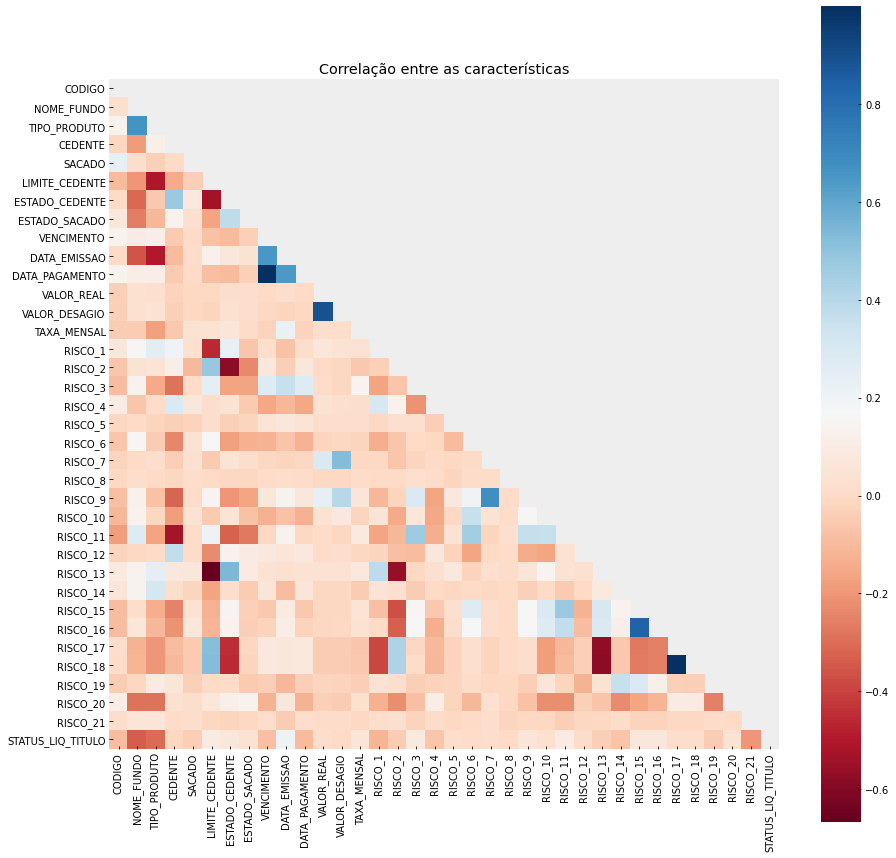

In [97]:
df_correlacao = df_copia.corr()

mask = np.triu(np.ones_like(df_correlacao, dtype=np.bool))
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df_correlacao, cmap='RdBu', fmt='.2f', mask=mask, square=True, linecolor="white")
heatmap.set_title("Correlação entre as características")

In [98]:
df_copia.head()

,CODIGO,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,SACADO,LIMITE_CEDENTE,ESTADO_CEDENTE,ESTADO_SACADO,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,RISCO_1,RISCO_2,RISCO_3,RISCO_4,RISCO_5,RISCO_6,RISCO_7,RISCO_8,RISCO_9,RISCO_10,RISCO_11,RISCO_12,RISCO_13,RISCO_14,RISCO_15,RISCO_16,RISCO_17,RISCO_18,RISCO_19,RISCO_20,RISCO_21,STATUS_LIQ_TITULO
0,1,0,0,11,1655,10000000,1,25,86,136,98,1190.99,166.384869,0.028214,0.028472,1.0,0.000000,0.164840,0.000000,0.280779,0.0,0.610895,0.000000,0.042581,0.000000,0.201561,0.168124,0.0,0.066667,0.2,0.727965,0.738669,0.407407,0.860111,0.985155,1
1,2,1,0,0,415,8035714,5,10,184,341,193,29209.38,571.781205,0.017253,0.192935,0.5,0.958204,0.014139,0.013354,0.246686,0.0,0.380525,0.020198,0.015453,0.666667,0.161228,0.392065,0.0,0.266667,0.6,0.010041,0.012547,0.395062,0.698438,0.707374,1
2,3,0,0,11,2733,10000000,1,17,87,168,101,756.66,63.951581,0.022375,0.033609,1.0,0.000000,0.164840,0.000000,0.280779,0.0,0.581379,0.000000,0.042581,0.000000,0.201561,0.109617,0.0,0.066667,0.2,0.327489,0.321123,0.395062,0.890059,0.987560,0
3,4,1,0,0,5387,8035714,5,13,102,245,117,7869.88,190.764728,0.015082,0.183401,0.5,0.124609,0.007712,0.000024,0.684831,0.0,0.179036,0.020187,0.128587,0.666667,0.099808,0.415602,0.0,0.400000,0.6,0.012217,0.017485,0.419753,0.609827,0.906279,0
4,5,0,0,11,1316,10000000,1,18,42,142,54,1064.92,105.976693,0.031770,0.028472,1.0,0.000000,0.164840,0.000000,0.280779,0.0,0.514459,0.000000,0.042581,0.000000,0.201561,0.168124,0.0,0.066667,0.2,0.727965,0.738669,0.407407,0.860111,0.368493,1


Separando as features da variável alvo

In [99]:
x = df_copia.drop(["STATUS_LIQ_TITULO"], axis=1, inplace=False)
y = df_copia["STATUS_LIQ_TITULO"]

In [100]:
x.shape

(9415, 35)

In [101]:
y.shape

(9415,)

Normalizando os dados

In [102]:
x.columns

Index(['CODIGO', 'NOME_FUNDO', 'TIPO_PRODUTO', 'CEDENTE', 'SACADO',
       'LIMITE_CEDENTE', 'ESTADO_CEDENTE', 'ESTADO_SACADO', 'VENCIMENTO',
       'DATA_EMISSAO', 'DATA_PAGAMENTO', 'VALOR_REAL', 'VALOR_DESAGIO',
       'TAXA_MENSAL', 'RISCO_1', 'RISCO_2', 'RISCO_3', 'RISCO_4', 'RISCO_5',
       'RISCO_6', 'RISCO_7', 'RISCO_8', 'RISCO_9', 'RISCO_10', 'RISCO_11',
       'RISCO_12', 'RISCO_13', 'RISCO_14', 'RISCO_15', 'RISCO_16', 'RISCO_17',
       'RISCO_18', 'RISCO_19', 'RISCO_20', 'RISCO_21'],
      dtype='object')

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(x)
colunas = ['CODIGO', 'NOME_FUNDO', 'TIPO_PRODUTO', 'CEDENTE', 'SACADO',
       'LIMITE_CEDENTE', 'ESTADO_CEDENTE', 'ESTADO_SACADO', 'VENCIMENTO',
       'DATA_EMISSAO', 'DATA_PAGAMENTO', 'VALOR_REAL', 'VALOR_DESAGIO',
       'TAXA_MENSAL', 'RISCO_1', 'RISCO_2', 'RISCO_3', 'RISCO_4', 'RISCO_5',
       'RISCO_6', 'RISCO_7', 'RISCO_8', 'RISCO_9', 'RISCO_10', 'RISCO_11',
       'RISCO_12', 'RISCO_13', 'RISCO_14', 'RISCO_15', 'RISCO_16', 'RISCO_17',
       'RISCO_18', 'RISCO_19', 'RISCO_20', 'RISCO_21']
X = pd.DataFrame(X)
X.columns = colunas

In [104]:
X.head()

,CODIGO,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,SACADO,LIMITE_CEDENTE,ESTADO_CEDENTE,ESTADO_SACADO,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,RISCO_1,RISCO_2,RISCO_3,RISCO_4,RISCO_5,RISCO_6,RISCO_7,RISCO_8,RISCO_9,RISCO_10,RISCO_11,RISCO_12,RISCO_13,RISCO_14,RISCO_15,RISCO_16,RISCO_17,RISCO_18,RISCO_19,RISCO_20,RISCO_21
0,0.000000,0.00,0.0,0.478261,0.264335,1.000000,0.1,0.961538,0.217722,0.293737,0.240196,0.000377,0.001019,0.196473,0.028472,1.0,0.000000,0.164840,0.000000,0.280779,0.0,0.610884,0.000000,0.042581,0.000000,0.201561,0.168124,0.0,0.066667,0.2,0.727965,0.738669,0.407407,0.860111,0.985155
1,0.000106,0.25,0.0,0.000000,0.066283,0.803571,0.5,0.384615,0.465823,0.736501,0.473039,0.009381,0.003504,0.192631,0.192935,0.5,0.958204,0.014139,0.013354,0.246686,0.0,0.380491,0.020198,0.015453,0.666667,0.161228,0.392065,0.0,0.266667,0.6,0.010041,0.012547,0.395062,0.698438,0.707374
2,0.000212,0.00,0.0,0.478261,0.436512,1.000000,0.1,0.653846,0.220253,0.362851,0.247549,0.000238,0.000391,0.194427,0.033609,1.0,0.000000,0.164840,0.000000,0.280779,0.0,0.581365,0.000000,0.042581,0.000000,0.201561,0.109617,0.0,0.066667,0.2,0.327489,0.321123,0.395062,0.890059,0.987560
3,0.000319,0.25,0.0,0.000000,0.860406,0.803571,0.5,0.500000,0.258228,0.529158,0.286765,0.002523,0.001168,0.191870,0.183401,0.5,0.124609,0.007712,0.000024,0.684831,0.0,0.178983,0.020187,0.128587,0.666667,0.099808,0.415602,0.0,0.400000,0.6,0.012217,0.017485,0.419753,0.609827,0.906279
4,0.000425,0.00,0.0,0.478261,0.210190,1.000000,0.1,0.692308,0.106329,0.306695,0.132353,0.000337,0.000649,0.197720,0.028472,1.0,0.000000,0.164840,0.000000,0.280779,0.0,0.514439,0.000000,0.042581,0.000000,0.201561,0.168124,0.0,0.066667,0.2,0.727965,0.738669,0.407407,0.860111,0.368493


# Separando as features mais importantes para treinar o modelo

Primiero vamos separar os dados de teste e de treino

In [105]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
num_folds = 10 #>> numero folds da validação cruzada
num_instances = len(X) #>> numeor de instancias
seed = 7

Para fazer a seleção das variáveis utilizaremos o método feature selection

In [106]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

teste = SelectKBest(score_func = chi2, k=5)
fit = teste.fit(X,y)

print(fit.scores_)
features = fit.transform(X)

features = pd.DataFrame(features)
print(features)

[1.27158390e+01 3.41685008e+02 6.94697236e+02 2.60030852e-01
 2.99251894e+00 1.65935701e+01 1.52646426e+01 1.72631269e+00
 8.67127556e+00 3.66636887e+01 1.05588404e+01 2.04278605e-01
 9.70722621e-03 5.05007863e-02 4.33492100e+01 4.82270701e+00
 4.70322925e+01 4.38827312e+00 1.14370856e+00 2.64357633e-02
 7.89216606e-01 9.96513885e-03 1.61937461e+00 7.57097171e-01
 4.36848597e+01 4.24593004e-02 8.23271517e-01 4.34608797e+01
 5.06083134e+00 5.77346657e+00 1.87110945e+00 2.19800114e+00
 7.35603434e-02 1.27198820e+00 6.54946940e+01]
         0    1         2         3         4
0     0.00  0.0  0.000000  0.000000  0.985155
1     0.25  0.0  0.958204  0.666667  0.707374
2     0.00  0.0  0.000000  0.000000  0.987560
3     0.25  0.0  0.124609  0.666667  0.906279
4     0.00  0.0  0.000000  0.000000  0.368493
...    ...  ...       ...       ...       ...
9410  0.00  0.0  0.000000  0.000000  0.580625
9411  0.00  0.0  0.000000  0.000000  0.996395
9412  0.00  0.0  0.000000  0.000000  0.897135
9413 

Para verificar quais variáveis tem uma maior correlação para um melhor desempenho do modelo, temos que criar um modelo utilizando o algoritimo Decision Tree Classifier. Após o treinamento deste modelo poderemos avalias o desempneho de cada variável e selecioanr as que tiveram uma maior influência no resultado.

In [107]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier()
arvore.fit(x_train, y_train)
result = arvore.predict(x_test)

In [108]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(arvore.score(x_test, y_test))
print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

0.8046017699115044
[[ 287  261]
 [ 291 1986]]
              precision    recall  f1-score   support

           0       0.50      0.52      0.51       548
           1       0.88      0.87      0.88      2277

    accuracy                           0.80      2825
   macro avg       0.69      0.70      0.69      2825
weighted avg       0.81      0.80      0.81      2825



Agora que o modelo foi treinado, veremos quais as vairáveis foram as mais importantes utilizando o método feature_importances

In [109]:
arvore.feature_importances_

array([0.06143156, 0.19073134, 0.00249323, 0.02203058, 0.05996389,
       0.00110585, 0.00255601, 0.01723758, 0.05836101, 0.03651078,
       0.09417214, 0.03209554, 0.04652356, 0.05068668, 0.01400794,
       0.00161954, 0.00130611, 0.00921833, 0.00412762, 0.00220884,
       0.00387427, 0.06239303, 0.01278652, 0.00867885, 0.00127444,
       0.00164165, 0.02426888, 0.00023877, 0.00746799, 0.00071709,
       0.04579993, 0.00816518, 0.00875907, 0.02670811, 0.07883807])

In [110]:
feature_imp = pd.Series(arvore.feature_importances_, index=X.columns)

In [111]:
feature_imp.sort_values(ascending=False)

NOME_FUNDO        0.190731
DATA_PAGAMENTO    0.094172
RISCO_21          0.078838
RISCO_8           0.062393
CODIGO            0.061432
SACADO            0.059964
VENCIMENTO        0.058361
TAXA_MENSAL       0.050687
VALOR_DESAGIO     0.046524
RISCO_17          0.045800
DATA_EMISSAO      0.036511
VALOR_REAL        0.032096
RISCO_20          0.026708
RISCO_13          0.024269
CEDENTE           0.022031
ESTADO_SACADO     0.017238
RISCO_1           0.014008
RISCO_9           0.012787
RISCO_4           0.009218
RISCO_19          0.008759
RISCO_10          0.008679
RISCO_18          0.008165
RISCO_15          0.007468
RISCO_5           0.004128
RISCO_7           0.003874
ESTADO_CEDENTE    0.002556
TIPO_PRODUTO      0.002493
RISCO_6           0.002209
RISCO_12          0.001642
RISCO_2           0.001620
RISCO_3           0.001306
RISCO_11          0.001274
LIMITE_CEDENTE    0.001106
RISCO_16          0.000717
RISCO_14          0.000239
dtype: float64

Visualizando graficamente as Features mais importantes

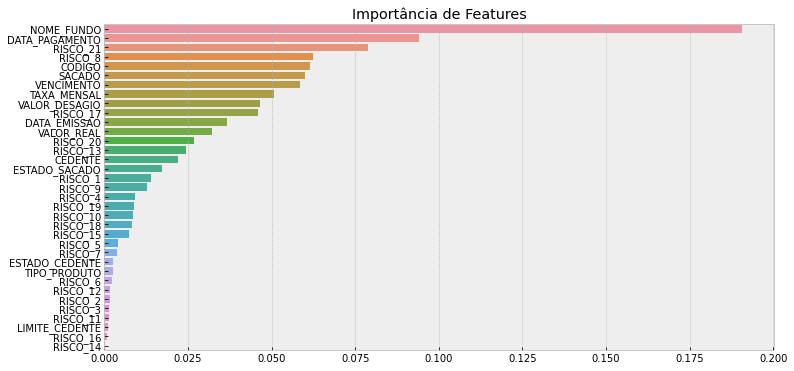

In [112]:
plt.figure(figsize=(12, 6))
feature_imp_sort = feature_imp.sort_values(ascending=False)
sns.barplot(x=feature_imp_sort, y=feature_imp_sort.index)
plt.title("Importância de Features")
plt.show()

Como podemos ver no gráfico, algumas variáveis tem pouca influência no resultado do treinamento então vamos eliminar esta colunas para tentar melhorar o desempenho do modelo

In [113]:
X = X.drop(["RISCO_11", "RISCO_14", "LIMITE_CEDENTE", "RISCO_12", "RISCO_3", "ESTADO_CEDENTE", "TIPO_PRODUTO",
            "RISCO_2", "RISCO_7", "RISCO_7", "RISCO_16", "RISCO_6", "RISCO_5"], axis=1)

Agora que algumas colunas foram eliminadas poderemos ver como ficou o dataset com todas as tranformações e podemo treinar os modelos de Machine Learning

In [114]:
X.head()

,CODIGO,NOME_FUNDO,CEDENTE,SACADO,ESTADO_SACADO,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,RISCO_1,RISCO_4,RISCO_8,RISCO_9,RISCO_10,RISCO_13,RISCO_15,RISCO_17,RISCO_18,RISCO_19,RISCO_20,RISCO_21
0,0.000000,0.00,0.478261,0.264335,0.961538,0.217722,0.293737,0.240196,0.000377,0.001019,0.196473,0.028472,0.164840,0.610884,0.000000,0.042581,0.168124,0.066667,0.727965,0.738669,0.407407,0.860111,0.985155
1,0.000106,0.25,0.000000,0.066283,0.384615,0.465823,0.736501,0.473039,0.009381,0.003504,0.192631,0.192935,0.014139,0.380491,0.020198,0.015453,0.392065,0.266667,0.010041,0.012547,0.395062,0.698438,0.707374
2,0.000212,0.00,0.478261,0.436512,0.653846,0.220253,0.362851,0.247549,0.000238,0.000391,0.194427,0.033609,0.164840,0.581365,0.000000,0.042581,0.109617,0.066667,0.327489,0.321123,0.395062,0.890059,0.987560
3,0.000319,0.25,0.000000,0.860406,0.500000,0.258228,0.529158,0.286765,0.002523,0.001168,0.191870,0.183401,0.007712,0.178983,0.020187,0.128587,0.415602,0.400000,0.012217,0.017485,0.419753,0.609827,0.906279
4,0.000425,0.00,0.478261,0.210190,0.692308,0.106329,0.306695,0.132353,0.000337,0.000649,0.197720,0.028472,0.164840,0.514439,0.000000,0.042581,0.168124,0.066667,0.727965,0.738669,0.407407,0.860111,0.368493


## Criação dos modelos de Machine Learning

Como existem diversas formas de resolver o problema, iremos testar vários algoritmos para identificar o que terá um melhor desepenho para esta situação. são eles:
- Logistis Regression
- KNN
- Random Forest
- Naive Bayes
- SVM
- MLP Classifier
- Decision Tree

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

Agora que as bibliotecas foram importadas, irei utilizar o cross validate para separar os dados de treino e teste, onde é definido 5 folds para a separação dos dados de treino e teste e fo utilizada como métrica para avaliar o desempenho dos modelos a Acurácia, que é a proporção de registros que o modelo acertou relativo ao resultado esperado.

Para isso criei uma função onde trago todos os elementos de uma lista com os modelos que irei utilizar e seus respectivos nomes, utilizando o método cross_val_score para avaliar cada modelo da lista, usando os dados de treino e teste e o score definio é a Acurácia.

In [116]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

# Definindo os valores para o número de folds
num_folds = 5
num_instances = len(X)
seed = 7

# Preparando o modelo

modelos = []
modelos.append(("LogisticRegression", LogisticRegression()))
modelos.append(("DecisionTreeClassifier", DecisionTreeClassifier(random_state=0, max_depth=30, max_features=5)))
modelos.append(("KNeighborsClassifier", KNeighborsClassifier(n_neighbors=17, p=1)))
modelos.append(("MLPClassifier", MLPClassifier(hidden_layer_sizes=(20, 10, 20), max_iter=10000)))
modelos.append(("SuportVectorMachine", SVC(kernel='linear', gamma='auto')))
modelos.append(("NaiveBayes", GaussianNB()))
modelos.append(("RandomForestClassifier", RandomForestClassifier(n_estimators=200, criterion='entropy', n_jobs=-1, max_depth=100, 
                                                                 bootstrap=True, random_state=0)))

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
   kfold = KFold(n_splits = num_folds, shuffle=True, random_state = seed)
   cv_results = cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')
   resultados.append(cv_results)
   nomes.append(nome)
   msg = "%s - Acurácia: %f, Desvio Padrão: %f" % (nome, cv_results.mean(), cv_results.std())
   print(msg)

LogisticRegression - Acurácia: 0.848858, Desvio Padrão: 0.007302
DecisionTreeClassifier - Acurácia: 0.792353, Desvio Padrão: 0.007593
KNeighborsClassifier - Acurácia: 0.860967, Desvio Padrão: 0.005142
MLPClassifier - Acurácia: 0.856718, Desvio Padrão: 0.011333
SuportVectorMachine - Acurácia: 0.852469, Desvio Padrão: 0.006960
NaiveBayes - Acurácia: 0.796176, Desvio Padrão: 0.017720
RandomForestClassifier - Acurácia: 0.873818, Desvio Padrão: 0.004920


Os resultados encontrados foram armazenados nesta lista

In [117]:
resultados

[array([0.84970791, 0.85926713, 0.8385555 , 0.85342539, 0.8433351 ]),
 array([0.78916622, 0.80509825, 0.79182156, 0.78173128, 0.79394583]),
 array([0.86510887, 0.86829527, 0.85395645, 0.85767392, 0.85979819]),
 array([0.85873606, 0.87785449, 0.84811471, 0.84705258, 0.85183218]),
 array([0.85077005, 0.8645778 , 0.84864578, 0.85448752, 0.84386617]),
 array([0.82315454, 0.76739246, 0.7976633 , 0.79872544, 0.79394583]),
 array([0.87573022, 0.88157196, 0.86776421, 0.87466808, 0.86935741])]

Agora vamos transformar este array numpy em um dataframe e juntar os nomes dos algoritimos

In [118]:
df_resultado = pd.DataFrame(resultados, columns=["Resultado1", "Resultado2", "Resultado3", "Resultado4", "Resultado5"])

In [119]:
df_nomes = pd.DataFrame(nomes, columns=["Nomes"])

In [120]:
nome_resultado = pd.concat([df_nomes, df_resultado], axis=1)

Este é o dataframe com o nome dos algoritmos e seus respectivos resultados em cada uma das iterações, de acordo com o treinamento realizado anteriomente

In [121]:
nome_resultado

,Nomes,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5
0,LogisticRegression,0.849708,0.859267,0.838555,0.853425,0.843335
1,DecisionTreeClassifier,0.789166,0.805098,0.791822,0.781731,0.793946
2,KNeighborsClassifier,0.865109,0.868295,0.853956,0.857674,0.859798
3,MLPClassifier,0.858736,0.877854,0.848115,0.847053,0.851832
4,SuportVectorMachine,0.850770,0.864578,0.848646,0.854488,0.843866
5,NaiveBayes,0.823155,0.767392,0.797663,0.798725,0.793946
6,RandomForestClassifier,0.875730,0.881572,0.867764,0.874668,0.869357


Agora vamos inserir uma nova coluna com a média do resultado de cada algoritmo

In [122]:
nome_resultado["Media"] = (nome_resultado["Resultado1"]+ nome_resultado["Resultado2"]+ nome_resultado["Resultado3"]+ 
                           nome_resultado["Resultado4"]+ nome_resultado["Resultado5"]) / 5

In [123]:
nome_resultado.sort_values(by="Media", ascending=False)

,Nomes,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5,Media
6,RandomForestClassifier,0.875730,0.881572,0.867764,0.874668,0.869357,0.873818
2,KNeighborsClassifier,0.865109,0.868295,0.853956,0.857674,0.859798,0.860967
3,MLPClassifier,0.858736,0.877854,0.848115,0.847053,0.851832,0.856718
4,SuportVectorMachine,0.850770,0.864578,0.848646,0.854488,0.843866,0.852469
0,LogisticRegression,0.849708,0.859267,0.838555,0.853425,0.843335,0.848858
5,NaiveBayes,0.823155,0.767392,0.797663,0.798725,0.793946,0.796176
1,DecisionTreeClassifier,0.789166,0.805098,0.791822,0.781731,0.793946,0.792353


Após a ordenação, podemos verificar que o algoritmo que obteve um melhor desempenho foi o KNN, seguido de perto do MLP Classifier.

Para ficar mais claro iremos plotar um gráfico com a média dos resultados de cada algoritimo.

Text(0.5, 1.0, 'Média da acurácia dos modelos treinados')

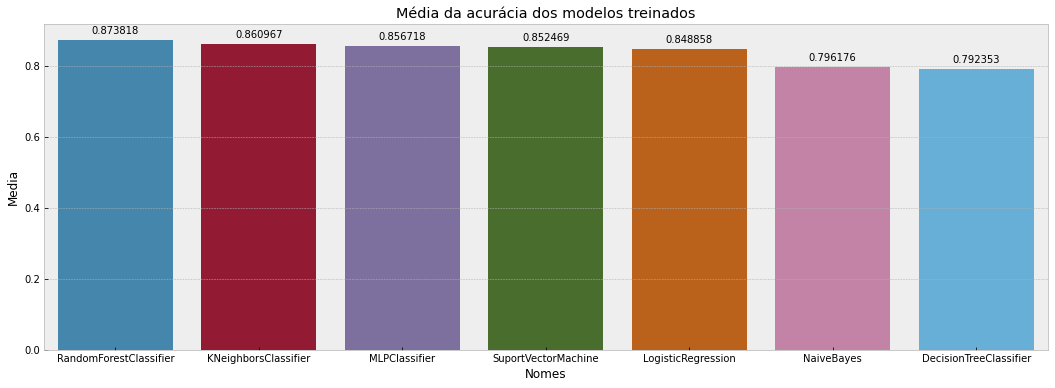

In [124]:
fig = plt.figure(figsize = (18, 6))
splot = sns.barplot(x="Nomes", y="Media", data=nome_resultado.sort_values(by="Media", ascending=False))
# percorrendo cada barra e calculando sua altura para imprimir no gráfico
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Média da acurácia dos modelos treinados")

## Resultado

Conforme foi apresentado nos resultados e no gráfico acima, os algoritimos que tiveram um melhor desempenho foram pela ordem o Radom Forest, que alcançou uma acurácia de 87,38%, seguido do KNeighborsClassifier (KNN) com 86,09% de acurácia e depois o MLP Classifier, com 85,67% de acurácia.

Lembrando que existem diversas métricas para avaliar o desempenho destes modelos, além do que o processo de treiamento e validação do modelo é um processo cíclico e contínuo, onde deve ser realizado novos testes afim de estar sempre melhorando o desempenho do modelo.